# 2. Exploratory Data Analysis

In [1]:
#import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
#load dataset
ames_df = pd.read_csv('../data/ames_test_data.csv')
ames_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


In [3]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   int64  
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

## 2.1 Dropping unwanted columns and rows

### Residential Zoning

In [4]:
ames_df.shape

(2051, 81)

In [5]:
#drop categories A (agr), C (all) and I (all)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'A (agr)'].index, inplace = True)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'C (all)'].index, inplace = True)
ames_df.drop(ames_df[ames_df['ms_zoning'] == 'I (all)'].index, inplace = True)

In [6]:
ames_df.shape

(2029, 81)

Rows with entries from categories A (Agriculture), C (Commericial) and I (Industrial) are dropped as the analysis concentrates on the zoning for residential properties. Since the entries from these three categories attributed to 22 entries, they will not have a significant impact on the size of data samples.

### Basement Area

In [7]:
ames_df[['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']].head(10)

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
0,533.0,0.0,192.0,725.0
1,637.0,0.0,276.0,913.0
2,731.0,0.0,326.0,1057.0
3,0.0,0.0,384.0,384.0
4,0.0,0.0,676.0,676.0
5,247.0,713.0,557.0,1517.0
6,547.0,0.0,0.0,547.0
7,1000.0,0.0,188.0,1188.0
8,292.0,0.0,632.0,924.0
9,650.0,0.0,390.0,1040.0


The sum of 'bsmtfin_sf_1','bsmtfin_sf_2' & 'bsmt_unf_sf' equals to 'total_bsmt_sf', therefore it would be better to drop these three columns and keep 'total_bsmt_sf'.

In [8]:
#drop 'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf'
ames_df.drop(columns=['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf'], inplace=True)

In [9]:
ames_df.shape

(2029, 78)

### Garage Year

In [10]:
ames_df[['garage_yr_blt','year_built']].head(10)

,garage_yr_blt,year_built
0,1976,1976
1,1997,1996
2,1953,1953
3,2007,2006
4,1957,1900
5,1966,1966
6,2005,2005
7,1959,1959
8,1952,1952
9,1969,1969


The columns 'garage_yr_blt' and 'year_built' are very similar, therefore it would be better to drop 'garage_year_blt'.

In [11]:
#drop 'garage_yr_blt' 
ames_df.drop(columns=['garage_yr_blt'], inplace=True)

In [12]:
ames_df.shape

(2029, 77)

### Above Ground Living Area

In [13]:
ames_df.loc[ames_df['low_qual_fin_sf']!= 0,['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area']].head()

,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
249,640,0,205,845
269,520,600,80,1200
320,854,0,528,1382
382,929,929,371,2229
497,1166,0,473,1639


Since 'gr_liv_area' is the sum of '1st_flr_sf','2nd_flr_sf' & 'low_qual_fin_sf', we can drop the 3 columns and keep 'gr_liv_area'.

In [14]:
#drop '1st_flr_sf','2nd_flr_sf' & 'low_qual_fin_sf' columns
ames_df.drop(columns=['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf'], inplace=True)

In [15]:
ames_df.shape

(2029, 74)

### ID & PID  

'ID' & 'PID' columns are dropped as they are identification numbers and are not likely to affect the sale price.

In [16]:
#drop 'id' & 'pid' columns
ames_df.drop(columns=['id','pid'], inplace=True)

In [17]:
ames_df.shape

(2029, 72)

### Sale Price

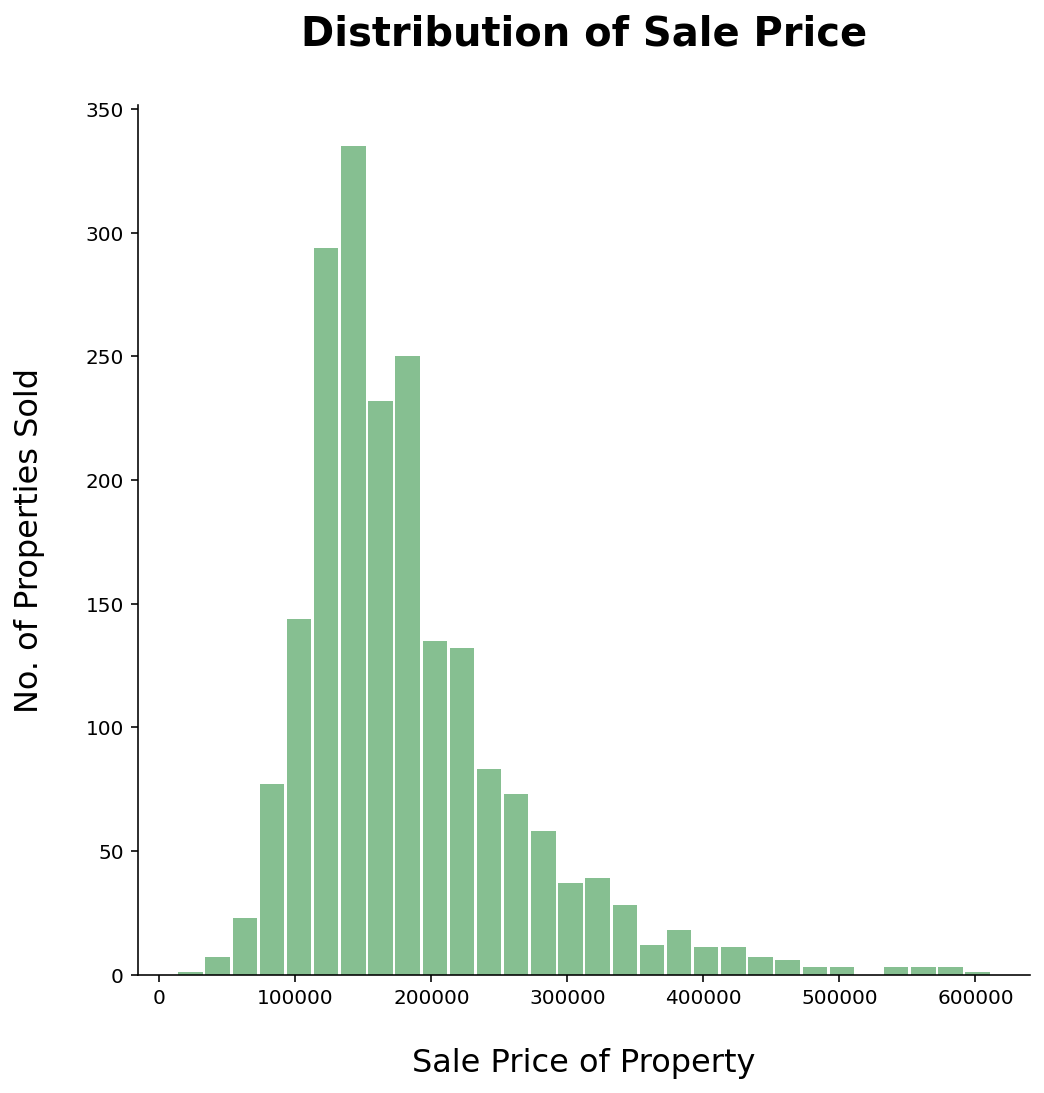

In [18]:
#assign variable name for plot
saleprice_hist = ames_df['saleprice'].hist(figsize = (8,8), bins=30, grid=False, color = '#86bf91', rwidth = 0.9)

#set title and x,y labels
plt.title("Distribution of Sale Price", pad=30, weight='bold', size=20)
plt.xlabel('Sale Price of Property', labelpad=20, size=16)
plt.ylabel('No. of Properties Sold', labelpad=20, size=16)

#despine top and right
saleprice_hist.spines['right'].set_visible(False)
saleprice_hist.spines['top'].set_visible(False)

In [19]:
ames_df['saleprice'].describe()

count      2029.000000
mean     182631.801873
std       78819.047770
min       12789.000000
25%      130000.000000
50%      163500.000000
75%      214900.000000
max      611657.000000
Name: saleprice, dtype: float64

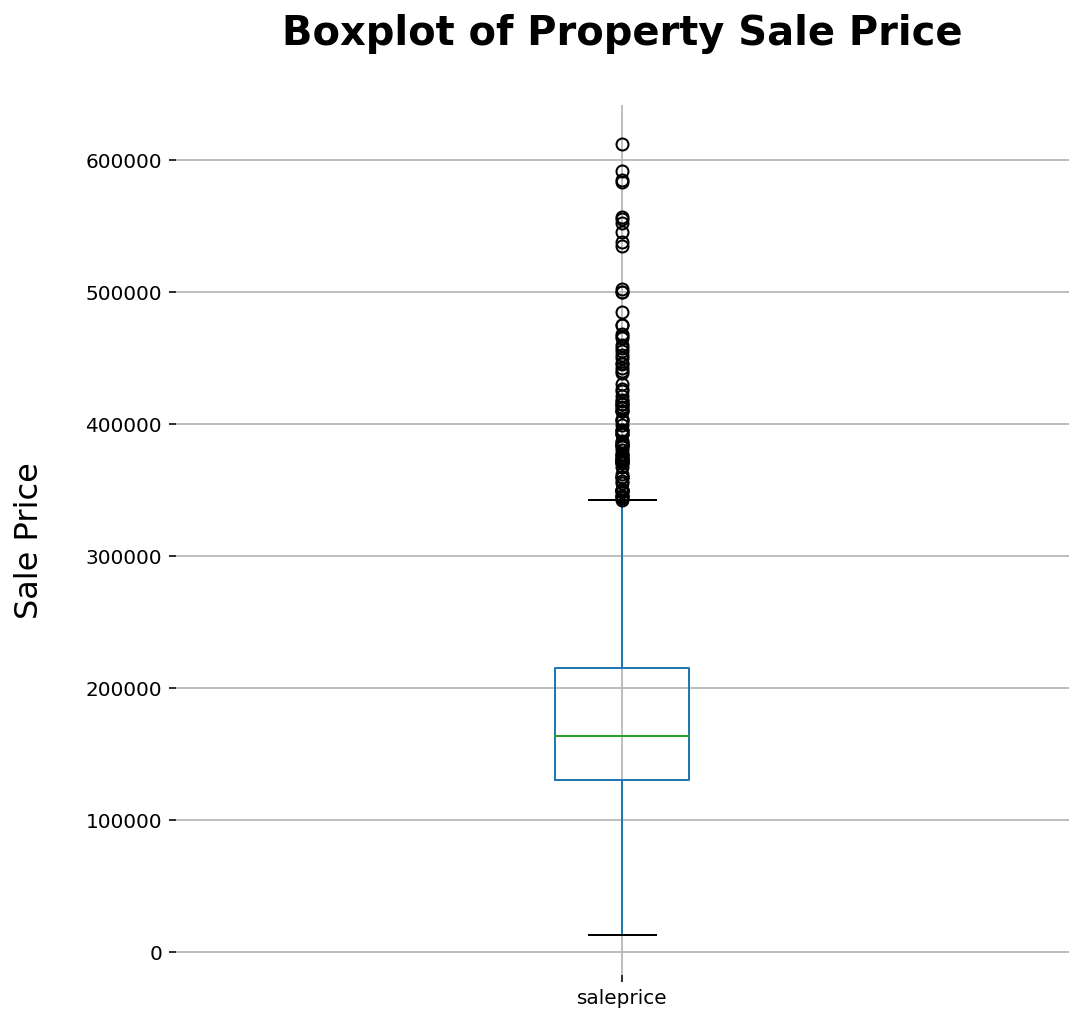

In [20]:
#boxplot for 'saleprice'
saleprice_boxplot = ames_df.boxplot(column=['saleprice'], figsize = (8,8))

#set title and y labels
plt.title("Boxplot of Property Sale Price", pad=30, weight='bold', size=20)
plt.ylabel('Sale Price', labelpad=20, size=16)

#despine
saleprice_boxplot.spines['right'].set_visible(False)
saleprice_boxplot.spines['top'].set_visible(False)
saleprice_boxplot.spines['bottom'].set_visible(False)
saleprice_boxplot.spines['left'].set_visible(False)

From the boxplot, there are a good number of outliers. They represent properties that have a sale price of more than 350,000. 
To make the distribution less skewed, it will be better to remove the entries that deviate by more than 3 standard deviation from the mean. 

From the statisical summary, the mean is 182,632 and the standard deviation is 78,819.

In [21]:
lowerLimit = 182632 - (3*78819)
upperLimit = 182632 + (3*78819)
print(lowerLimit, upperLimit)

-53825 419089


Since the lower limit is negative, we will exclude entries with a sale price of more than 419,088.

In [22]:
ames_df.shape

(2029, 72)

In [23]:
#drop entries with 'saleprice' > 419,088
ames_df.drop(ames_df[ames_df['saleprice'] > 419088].index, inplace = True)

In [24]:
ames_df.shape

(1996, 72)

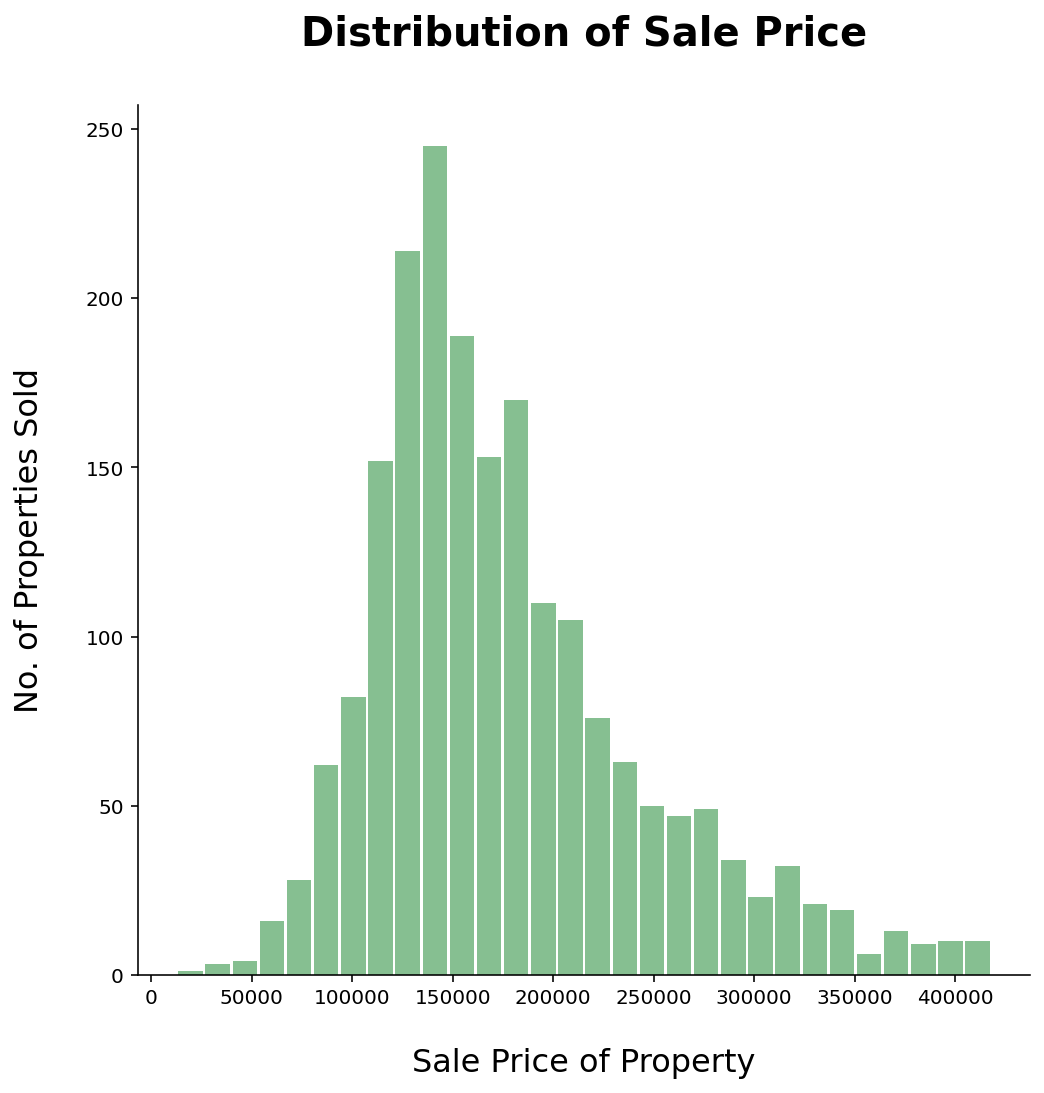

In [25]:
#assign variable name for plot
saleprice_hist = ames_df['saleprice'].hist(figsize = (8,8), bins=30, grid=False, color = '#86bf91', rwidth = 0.9)

#set title and x,y labels
plt.title("Distribution of Sale Price", pad=30, weight='bold', size=20)
plt.xlabel('Sale Price of Property', labelpad=20, size=16)
plt.ylabel('No. of Properties Sold', labelpad=20, size=16)

#despine top and right
saleprice_hist.spines['right'].set_visible(False)
saleprice_hist.spines['top'].set_visible(False)

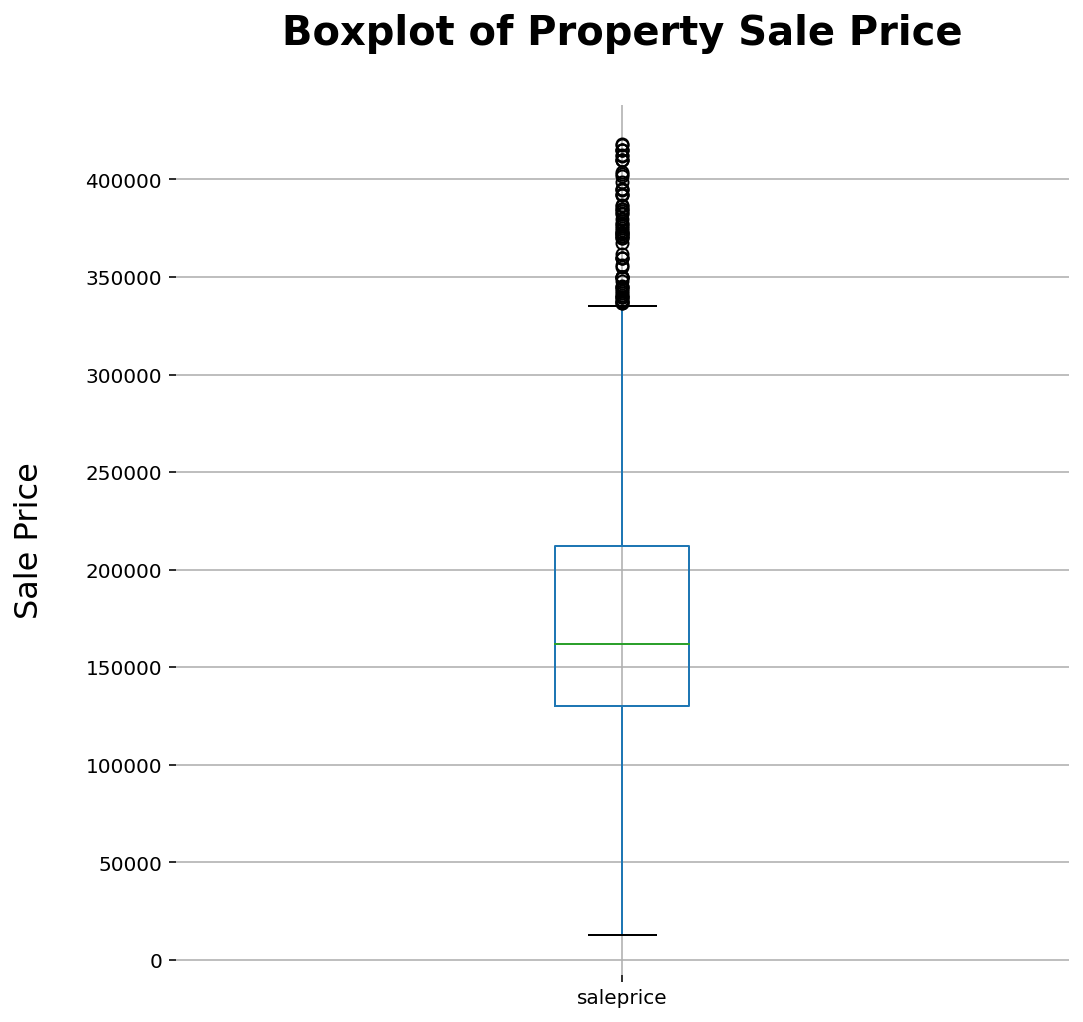

In [26]:
#boxplot for 'saleprice'
saleprice_boxplot = ames_df.boxplot(column=['saleprice'], figsize = (8,8))


#set title and y labels
plt.title("Boxplot of Property Sale Price", pad=30, weight='bold', size=20)
plt.ylabel('Sale Price', labelpad=20, size=16)

#despine
saleprice_boxplot.spines['right'].set_visible(False)
saleprice_boxplot.spines['top'].set_visible(False)
saleprice_boxplot.spines['bottom'].set_visible(False)
saleprice_boxplot.spines['left'].set_visible(False)

In [27]:
ames_df.shape

(1996, 72)

### Lot Area

Drop outliers for lot area

In [28]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 2050
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ms_subclass     1996 non-null   int64  
 1   ms_zoning       1996 non-null   object 
 2   lot_frontage    1996 non-null   int64  
 3   lot_area        1996 non-null   int64  
 4   street          1996 non-null   object 
 5   alley           1996 non-null   object 
 6   lot_shape       1996 non-null   object 
 7   land_contour    1996 non-null   object 
 8   utilities       1996 non-null   object 
 9   lot_config      1996 non-null   object 
 10  land_slope      1996 non-null   object 
 11  neighborhood    1996 non-null   object 
 12  condition_1     1996 non-null   object 
 13  condition_2     1996 non-null   object 
 14  bldg_type       1996 non-null   object 
 15  house_style     1996 non-null   object 
 16  overall_qual    1996 non-null   int64  
 17  overall_cond    1996 non-null   i

### Convert Categorical Variables to Numeric

In [29]:
#convert nominal variables to numeric using get_dummies
ames_df = pd.get_dummies(columns=
                    ['ms_subclass', 'ms_zoning','street', 'alley', 'land_contour', 'lot_config',
                     'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',
                     'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd','mas_vnr_type','foundation',
                     'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type'], data=ames_df)

In [30]:
#convert ordinal variables to numeric using get_dummies
ames_df = pd.get_dummies(columns=
                    ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
                     'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence'], data=ames_df)

In [31]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 2050
Columns: 274 entries, lot_frontage to fence_None
dtypes: float64(4), int64(25), object(10), uint8(235)
memory usage: 1.1+ MB


In [32]:
ames_df.lot_shape = ames_df.lot_shape.map({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4})

In [33]:
ames_df['lot_shape'].value_counts()

1    1262
2     674
3      51
4       9
Name: lot_shape, dtype: int64

In [34]:
ames_df.utilities = ames_df.utilities.map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4})

In [35]:
ames_df['utilities'].value_counts()

4    1995
2       1
Name: utilities, dtype: int64

In [36]:
ames_df.land_slope = ames_df.land_slope.map({'Gtl': 1, 'Mod': 2, 'Sev': 3})

In [37]:
ames_df['land_slope'].value_counts()

1    1905
2      81
3      10
Name: land_slope, dtype: int64

In [38]:
ames_df.exter_qual = ames_df.exter_qual.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [39]:
ames_df['exter_qual'].value_counts()

3    1233
4     686
5      58
2      19
Name: exter_qual, dtype: int64

In [40]:
ames_df.exter_cond = ames_df.exter_cond.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [41]:
ames_df['exter_cond'].value_counts()

3    1737
4     211
2      41
5       6
1       1
Name: exter_cond, dtype: int64

In [42]:
ames_df.heating_qc = ames_df.heating_qc.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [43]:
ames_df['heating_qc'].value_counts()

5    1030
3     586
4     315
2      63
1       2
Name: heating_qc, dtype: int64

In [44]:
ames_df.electrical = ames_df.electrical.map({'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5})

In [45]:
ames_df['electrical'].value_counts()

5    1823
4     132
3      35
2       5
1       1
Name: electrical, dtype: int64

In [46]:
ames_df.kitchen_qual = ames_df.kitchen_qual.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [47]:
ames_df['electrical'].value_counts()

5    1823
4     132
3      35
2       5
1       1
Name: electrical, dtype: int64

In [48]:
ames_df.functional = ames_df.functional.map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ':8})

In [49]:
ames_df['functional'].value_counts()

8    1866
6      41
7      41
5      26
4      12
3       7
2       2
1       1
Name: functional, dtype: int64

In [50]:
ames_df.paved_drive = ames_df.paved_drive.map({'N': 1, 'P': 2, 'Y': 3})

In [51]:
ames_df['paved_drive'].value_counts()

3    1822
1     135
2      39
Name: paved_drive, dtype: int64

In [52]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 2050
Columns: 274 entries, lot_frontage to fence_None
dtypes: float64(4), int64(35), uint8(235)
memory usage: 1.1 MB


In [57]:
print(ames_df.columns)

Index(['lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'land_slope',
       'overall_qual', 'overall_cond', 'year_built', 'year_remod/add',
       'mas_vnr_area',
       ...
       'pool_qc_Ex', 'pool_qc_Fa', 'pool_qc_Gd', 'pool_qc_None', 'pool_qc_TA',
       'fence_GdPrv', 'fence_GdWo', 'fence_MnPrv', 'fence_MnWw', 'fence_None'],
      dtype='object', length=274)


In [58]:
#save train_dataframe to csv
ames_df.to_csv('../data/ames_test_data.csv',index=False)